# Przewidywanie spożycia alkoholu przez studentów z wykorzystaniem prostej sieci nauronowej
## Analiza Zbioru danych
Dane omawiane w niniejszym dokumencie pobrane są ze strony https://www.kaggle.com/uciml/student-alcohol-consumption  
Zawierają one wyniki ankiety przeprowadzonej pośród studentów dwóch kursów: matematyki oraz portugalskiego. Podczas ankiety zebrano wiele danych o respondentach takie jak, wiek, oceny, rozmiar rodziny, czy też średnie spożycie alkoholu, które będzie przedmiotem niniejszej analizy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from subprocess import check_output

math_class_data = pd.read_csv(os.path.abspath('') + "/data/student-mat.csv",delimiter=";")
port_class_data = pd.read_csv(os.path.abspath('') + "/data/student-por.csv",delimiter=";")
data = math_class_data.append(port_class_data)
data = data[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3']]
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,guardian,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,course,mother,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,course,father,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,other,mother,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,home,mother,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,home,father,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,course,mother,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,course,mother,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,course,mother,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,course,mother,...,2,4,5,3,4,2,6,10,10,10


Pozwoliliśmy sobie na połaćzenie danych z dwóch kursów, ponieważ różnice wynikające z możliwych różnic w poziomach trudności (a co za tym idzie ocen) sa minimalne.  
Usunięte także zostały kolumny dotyczące pracy rodziców, ponieważ te dane niewiele wnoszą do modelu, a ich znaczenie jest marginalne. Należy także wziąć pod uwagę, że te kategorie są dość ogólne.  
Dane ną pełne, nie ma tu pustych komórek, co ułatwi trening sieci.  
Mamy tu ponad 1000 rekodrów, co wg informacji z wykładu powinno pozwolić na wytrenowanie sieci zawierającej (w przubliżeniu) do 100 neuronów.

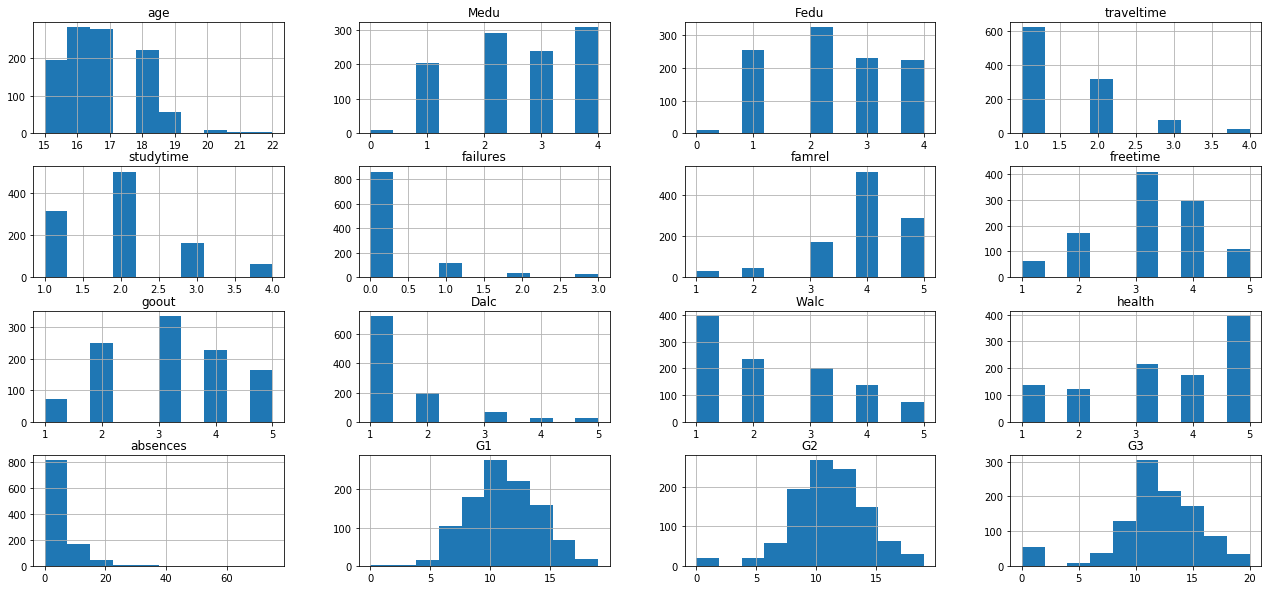

In [2]:
x = data.hist(figsize=(22,10),ylabelsize=10)